In [18]:
import visualkeras
import tensorflow as tf
from PIL import ImageFont
from keras.utils.vis_utils import plot_model
from keras.optimizers import *

def myprint(s):
    with open('/architectures/modelsummary.txt','a') as f:
        print(s, file=f)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 512, 512, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 256, 256, 32  0          ['conv2d_20[0][0]']              
                                )                                                           

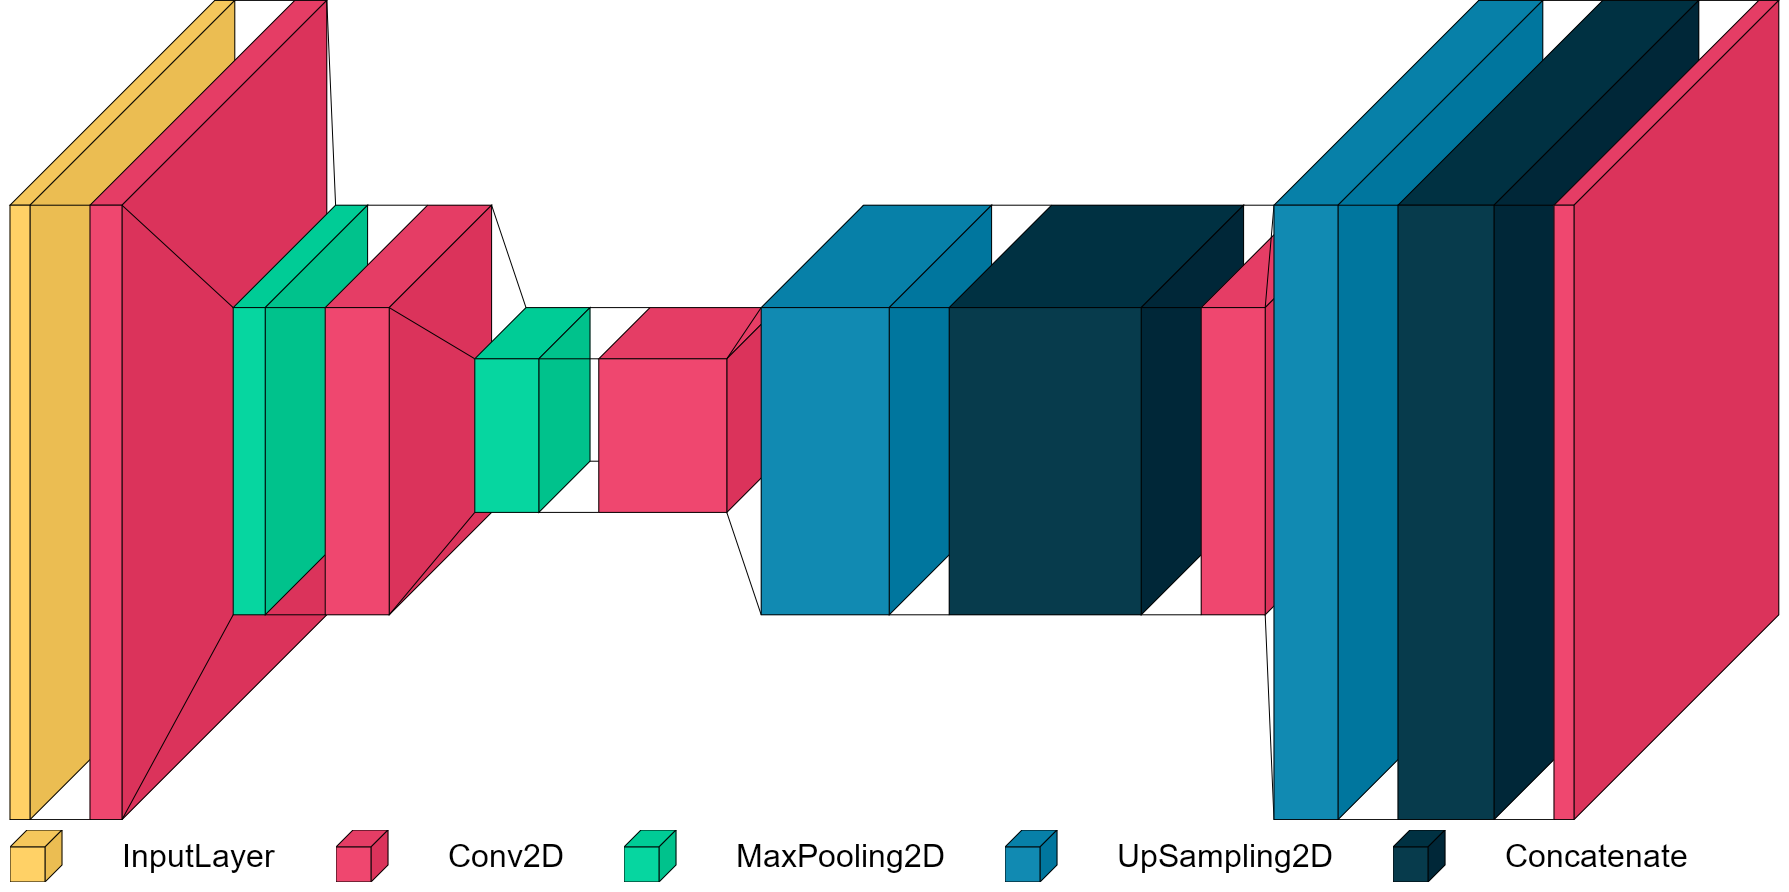

In [14]:

model = tf.keras.models.load_model("./models/custom-model/model/")
model.summary()


model.summary(print_fn=myprint)

tf.keras.utils.plot_model(model, 'model.png')
# visualkeras.layered_view(model, to_file='output-simple.png').show() # write and show


font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, scale_xy=1.2, scale_z=1, max_z=1000, legend=True, font=font, spacing=60, to_file="architectures/simple-model.png")


Model: "u_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(1, 512, 512, 3)]   0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (1, 512, 512, 64)    1792        ['input_2[0][0]']                
                                                                                                  
 activation (Activation)        (1, 512, 512, 64)    0           ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (1, 512, 512, 64)    36928       ['activation[0][0]']             
                                                                                              

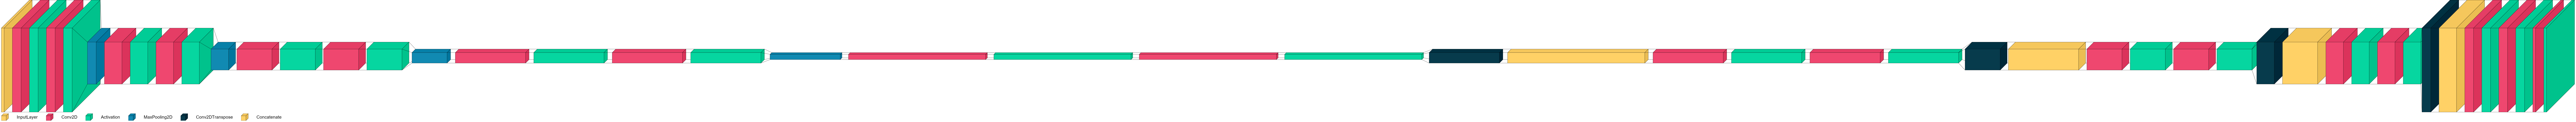

In [15]:
model = tf.keras.models.load_model("./models/u-net/model/")
model.summary()

# visualkeras.layered_view(model, to_file='output-simple.png').show() # write and show
model.summary(print_fn=myprint)

plot_model(model, to_file='/summaries/unet-model.png', show_shapes=True)
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, scale_xy=1.2, scale_z=1, max_z=1000, legend=True, font=font, spacing=60, to_file="architectures/u-net.png")


In [25]:
from focal_loss import BinaryFocalLoss

from SegNet import SegNet


model = tf.keras.models.load_model("./models/seg-net/model/")
model.summary()

visualkeras.layered_view(segNetModel, to_file='output-segnet.png').show() # write and show

plot_model(model, to_file='/summaries/resnet-model.png')
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, scale_xy=1.2, scale_z=1, max_z=1000, legend=True, font=font, spacing=60, to_file="architectures/u-net.png")


Model: "seg_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 512, 512, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d_24[0][0]']              
 alization)                     )                                                           

ValueError: Exception encountered when calling layer "max_pooling_with_argmax2d_21" (type MaxPoolingWithArgmax2D).

in user code:

    File "d:\deftrack\deftrack-experiments\layers.py", line 21, in call  *
        output, argmax = tf.nn.max_pool_with_argmax(

    ValueError: Shape must be rank 4 but is rank 5 for '{{node max_pooling_with_argmax2d_21/MaxPoolWithArgmax}} = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, include_batch_in_index=false, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,512,512,3,64].


Call arguments received by layer "max_pooling_with_argmax2d_21" (type MaxPoolingWithArgmax2D):
  • inputs=tf.Tensor(shape=(None, 512, 512, 3, 64), dtype=float32)
  • kwargs={'training': 'None'}